# Основы машинного обучения: лабораторная работа №2
## <!--Задание 1. -->Регрессионный анализ

В этом задании необходимо реализовать обучающиеся модели в контексте решения задачи регрессии на одном из представленных по варианту задания наборе данных.

### Цель

Получение навыков решения задачи регрессионного анализа и оптимизации функций методом градиентного спуска

### Оценивание и баллы

За это задание в общей сложности можно получить до 10 баллов. Задание частично проверяется автоматически, а частично будет оцениваться вручную. Чтобы получить максимальный балл,  необходимо успешно выполнить все приведенные ниже задачи.


***
#### Задачи

#### 1. Определить номер варианта
Перейдите по ссылке из личного кабинета на Google Таблицу со списком студентов. Найдите свое ФИО в списке и запомните соответствующий порядковый номер (поле № п/п) в первом столбце. Заполните его в ячейке ниже и выполните ячейку. Если вы не можете найти себя в списке, обратитесь к своему преподавателю.

In [15]:
### BEGIN YOUR CODE

Student_ID = 14

### END YOUR CODE

Теперь выполните следующую ячейку. Она вычислит номер задания и выведет его.

In [16]:
datasets = [('Diabetes dataset','https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes'), ('California Housing','https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#fetch-california-housing'), ('Auto MPG', 'https://archive.ics.uci.edu/dataset/9/auto+mpg'), ('Forest Fires', 'https://archive.ics.uci.edu/dataset/162/forest+fires'), ('Concrete Compressive Strength', 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength')]

dataset_id = None if Student_ID is None else Student_ID % len(datasets)
if dataset_id is None:
    print("ОШИБКА! Не указан порядковый номер студента в списке группы.")
else:
    print(f"Информация о датасете '{datasets[dataset_id][0]}' доступна по следующей ссылке: {datasets[dataset_id][1]}")

Информация о датасете 'Concrete Compressive Strength' доступна по следующей ссылке: https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength


#### 2. Подготовить среду разработки и данные
Добавьте импорт всех необходимых библиотек в ячейке ниже. Постарайтесь не импортировать библиотеки в других ячейках, чтобы избежать ошибок в коде

In [17]:
### BEGIN YOUR CODE

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np

### END YOUR CODE

При необходимости скачайте датасет с помощью команды `!wget ...` и разархивируйте его. Загрузите датасет в переменную `dataset`, с которой будете дальше работать

In [18]:
### BEGIN YOUR CODE

!wget https://archive.ics.uci.edu/static/public/165/concrete+compressive+strength.zip

!unzip concrete+compressive+strength.zip
# !tar ...
# !gunzip ...

dataset = pd.read_excel("Concrete_Data.xls")

### END YOUR CODE

--2024-11-26 12:14:58--  https://archive.ics.uci.edu/static/public/165/concrete+compressive+strength.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘concrete+compressive+strength.zip.1’

concrete+compressiv     [ <=>                ]  33.64K  --.-KB/s    in 0.05s   

2024-11-26 12:14:58 (684 KB/s) - ‘concrete+compressive+strength.zip.1’ saved [34444]

Archive:  concrete+compressive+strength.zip
replace Concrete_Data.xls? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Concrete_Data.xls       
replace Concrete_Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Concrete_Readme.txt     


####  3. Посмотреть на общую картину (1 балл)
Ознакомьтесь с информацией о датасете по ссылке из задания и **напишите один абзац текста с описанием решаемой задачи**. В частности, ответьте в своем тексте на следующие вопросы:

 * Каков размер датасета? (в Мб)
 * Сколько в нем записей (объектов)?
 * Сколько признаков (фич) у объектов в датасете?
 * Есть ли категориальные данные? Какие?
 * Есть ли пропущенные значения?
 * Есть ли в датасете столбец с ответами (target)? Какой у него тип данных?
 * Какую задачу может решать регрессионная модель, построенная на этом датасете? Какую величину она будет предсказывать?
 * Приведите основные статистические данные о датасете, которые можно получить вызовом одной-двух функций в pandas. Какие выводы о датасете можно сделать?

В ячейке ниже напишите код, который выводит всю необходимую информацию, а в ячейке под ней (ее тип - Markdown, т.е. текст) опишите своими словами решаемую задачу и используемый набор данных.

In [19]:
### BEGIN YOUR CODE

dataset.info()

#dataset.head()

#dataset.describe()

### END YOUR CODE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

Размер датасета составляет 72.5 килобайта. В датасете содержится описание компрессионой силы бетона (т.е. его способность сопротивляться давлению без появления трещин или существенных деформаций). В датасете выделяют следуюшие признаки помимо целевого(Concrete compressive strength):

*   Содержание цемента(Cement) в бетоне
*   Содержание доменного шлака(Blast Furnace Slag) в бетоне
*   Содержание зольной пыли(Fly Ash) в бетоне
*   Содержание воды(Water) в бетоне
*   Содержание суперпластификатора(Superplasticizer) в бетоне
*   Содержание крупного наполнителя(Coarse Aggregate) в бетоне
*   Содержание мелкого наполнителя(Fine Aggregate) в бетоне
*   Возраст бетона(Age)

Таким образом в анализируемом датасете 8 признаков. Все признаки кроме Age имеют тип данных float64, Age имеет тип данных int64, что означает, что в датасете нет категориальных признаков.\
\
Всего в датасете 1030 записей, среди них нет пропусков ни у каких значений.\
\
Как говорилось выше, целевой признак — компрессионная сила бетона(Concrete compressive strength), имеющая тип данных float64. Её и будет предсказывать регрессионная модель, построенная на этом датасете.





---
#### 4. Анализ данных, очистка, и масштабирование (2 балла)

**Анализ данных:** проверьте наличие корреляции между признаками. Некоторые из них могут оказаться более коррелированными с объясняемой переменной (target), чем остальные. Эта информация в дальнейшем поможет провалидировать найденные коэффициенты регрессионной модели.

**Очистка данных:** если датасет содержит пропущенные значения, заполните их с помощью модуля [`sklearn.impute`](https://scikit-learn.org/stable/modules/impute.html). Если в датасете есть категориальные признаки, [преобразуйте их в числовые](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features) с помощью `OneHotEncoder`.

**Масштабирование признаков.** Напишите код, осуществляющий нормализацию значений всех признаков [следующим образом](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling):

- вычесть среднее значение соответствующего признака из всех значений этого признака;
- отмасштабировать (поделить) значения признаков на СКО этих признаков.

**Особенности реализации:** напишите код, который реализует последовательность (пайплайн) обработки обучающих данных, а затем примените его к валидационной и тестовой выборкам в случае их наличия.

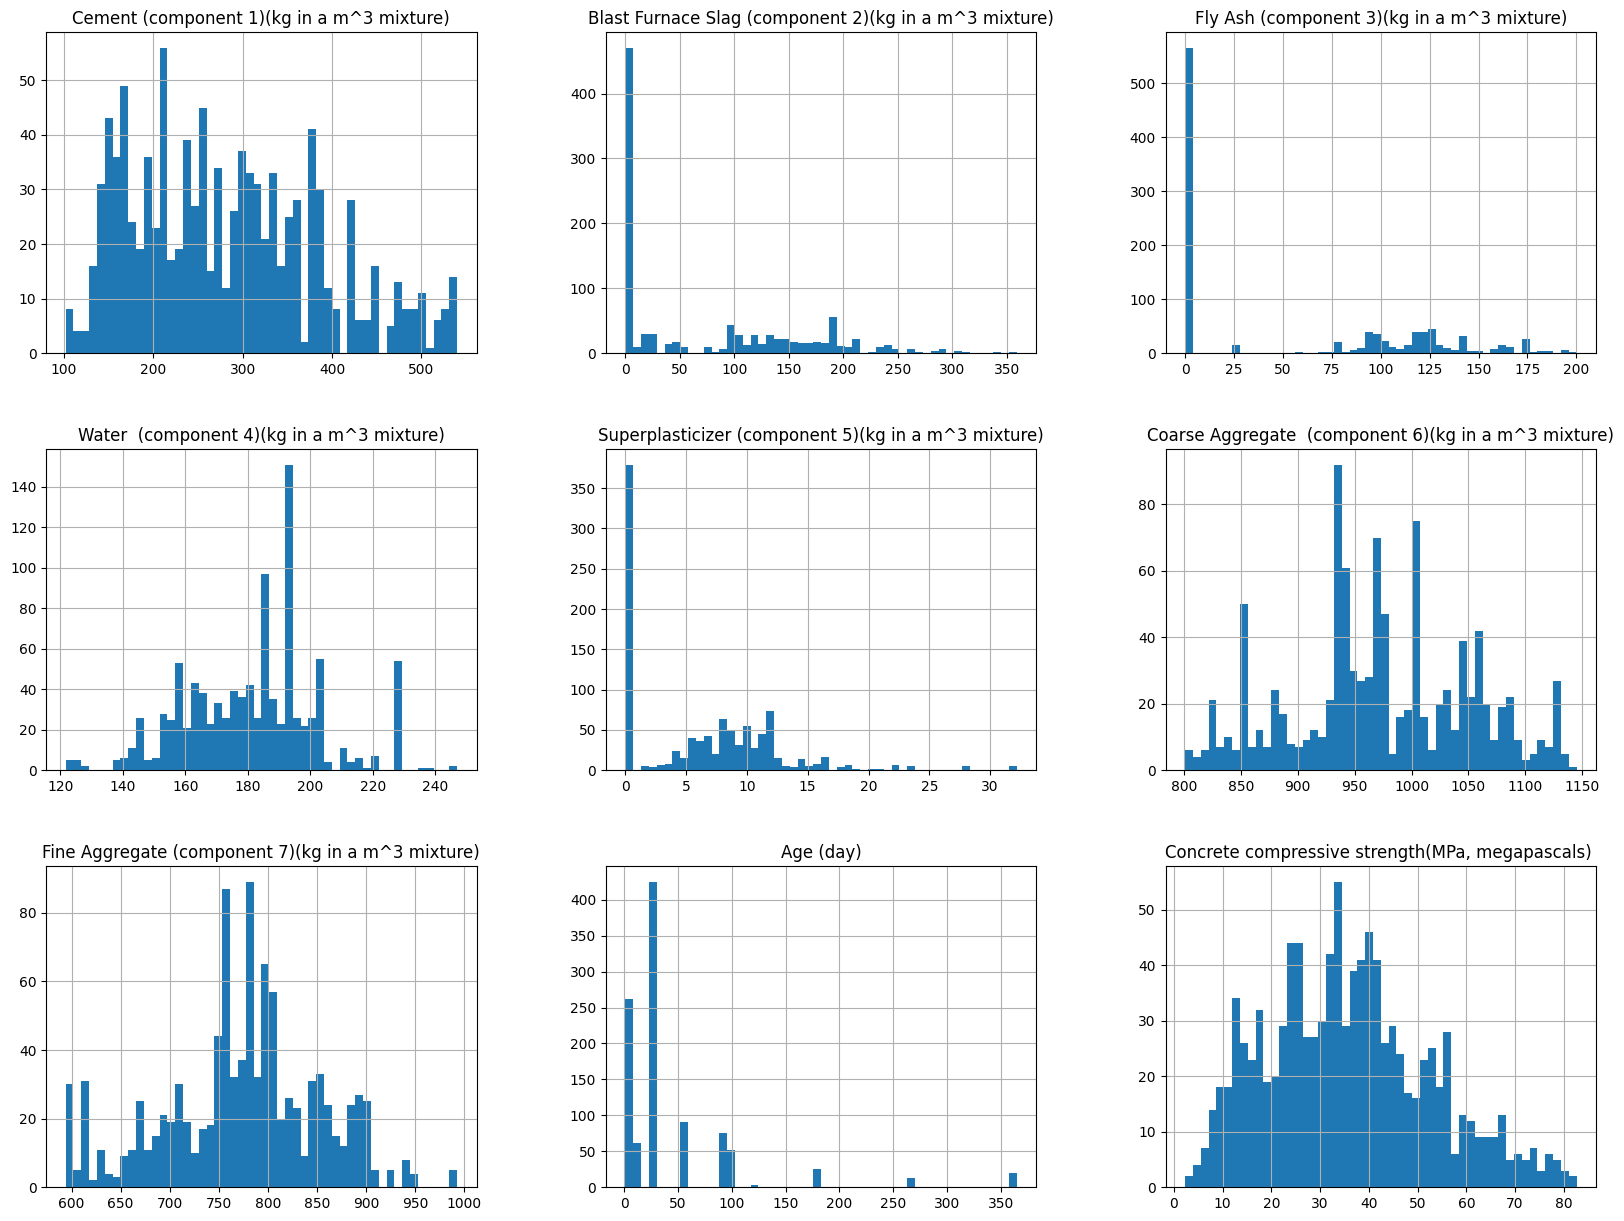

In [20]:
### BEGIN YOUR CODE

# рекомендуется разбить выборку на обучающую и тестовую, например, с помощью StratifiedShuffleSplit из sklearn.model_selection

# при необходимости добавьте дополнительные ячейки с кодом, чтобы разбить код на смысловые блоки и повысить его читабельность

dataset.hist(bins=50, figsize=(20,15))
plt.show()

### END YOUR CODE

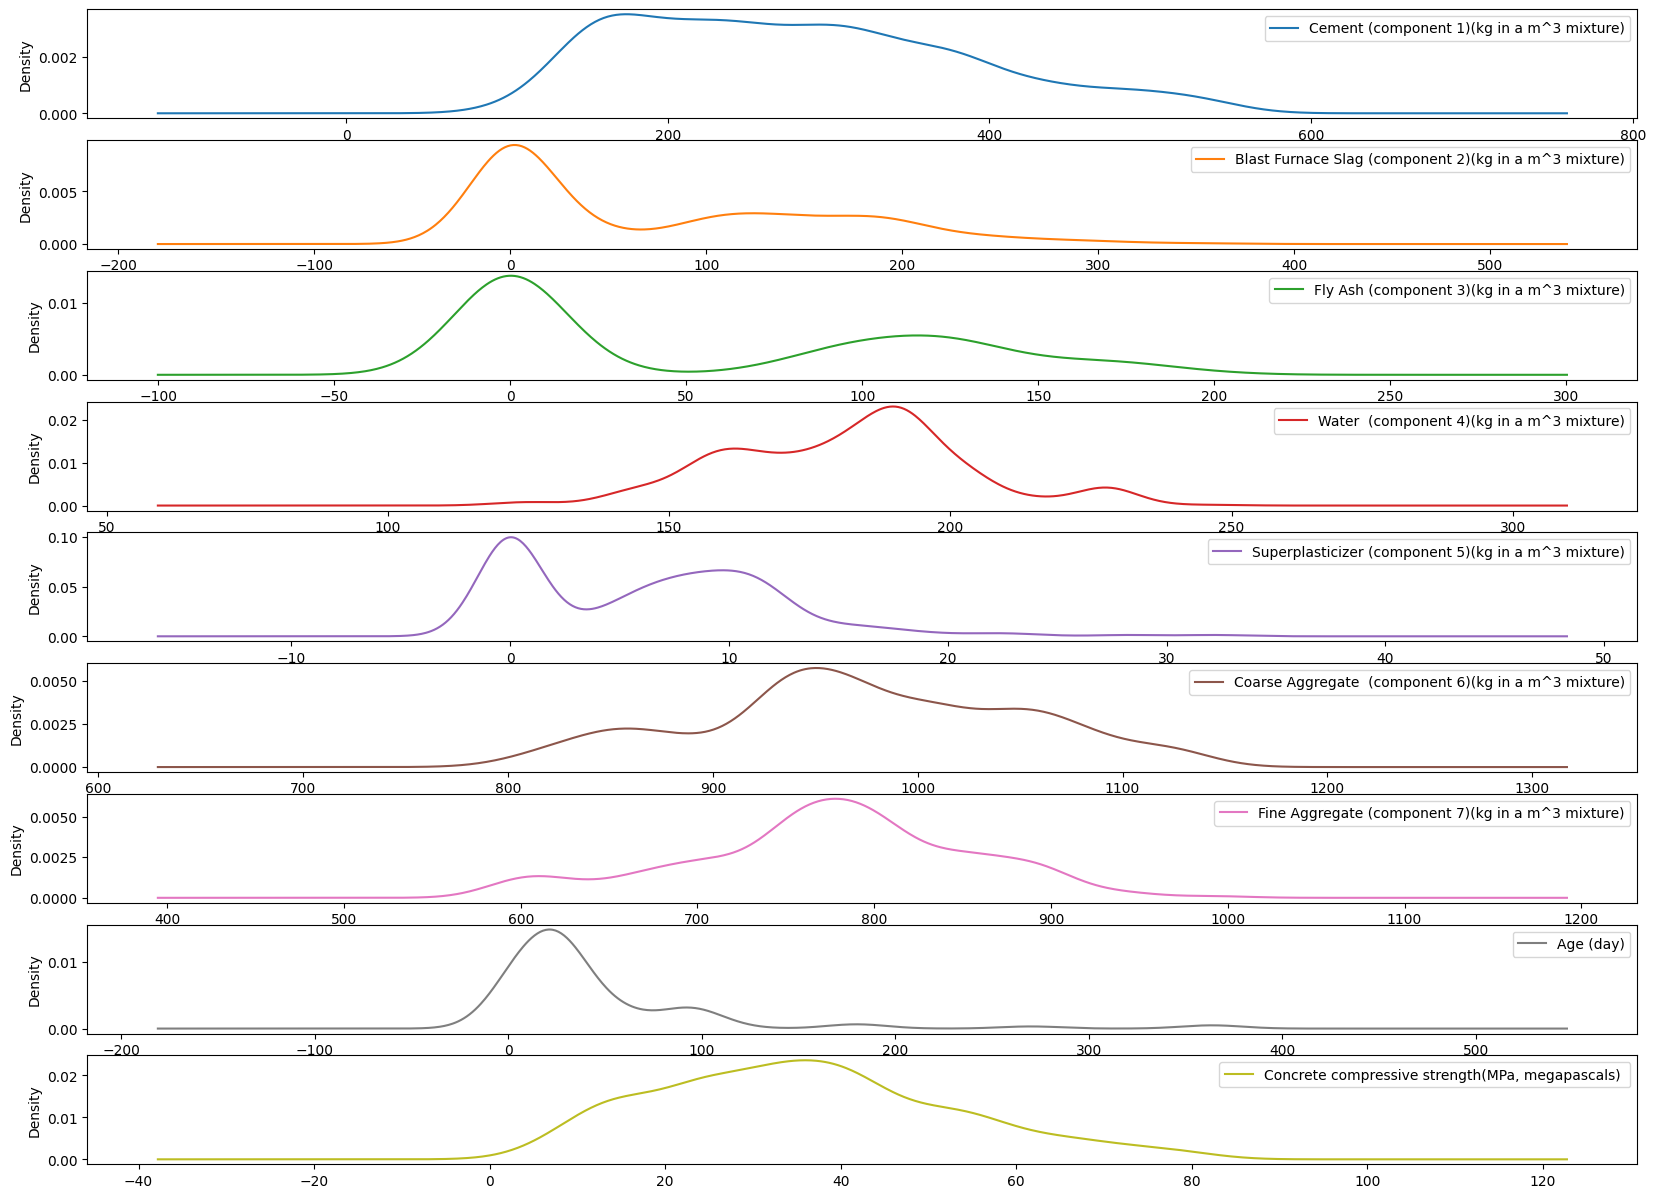

In [21]:
dataset.plot(kind="density", subplots=True, sharex=False, figsize=(20,15))
plt.show()

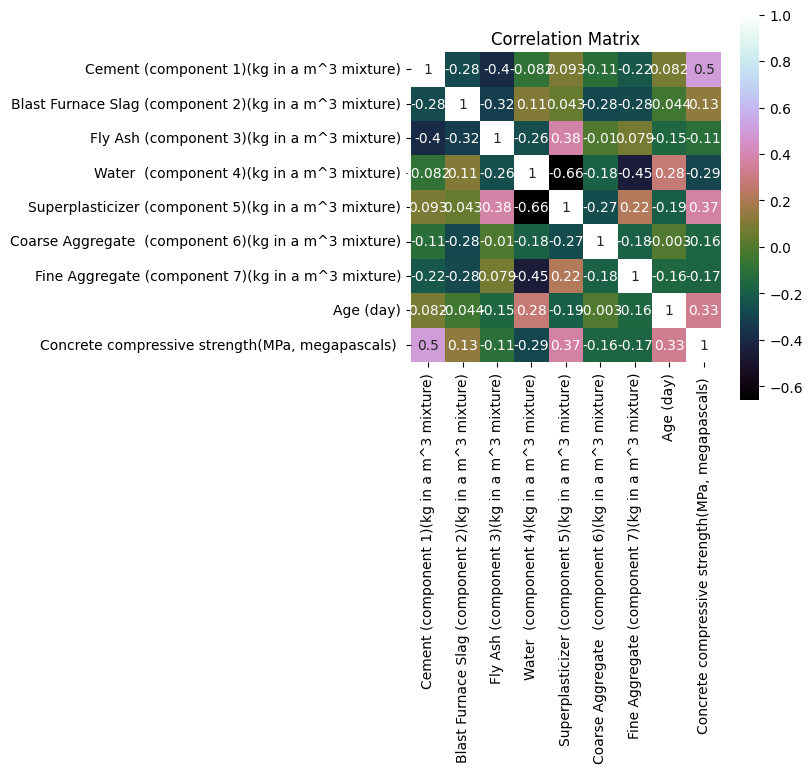

In [22]:
plt.figure(figsize=(5, 5))
plt.title("Correlation Matrix")
sns.heatmap(dataset.corr(), square=True, annot=True, cmap="cubehelix")
plt.show()

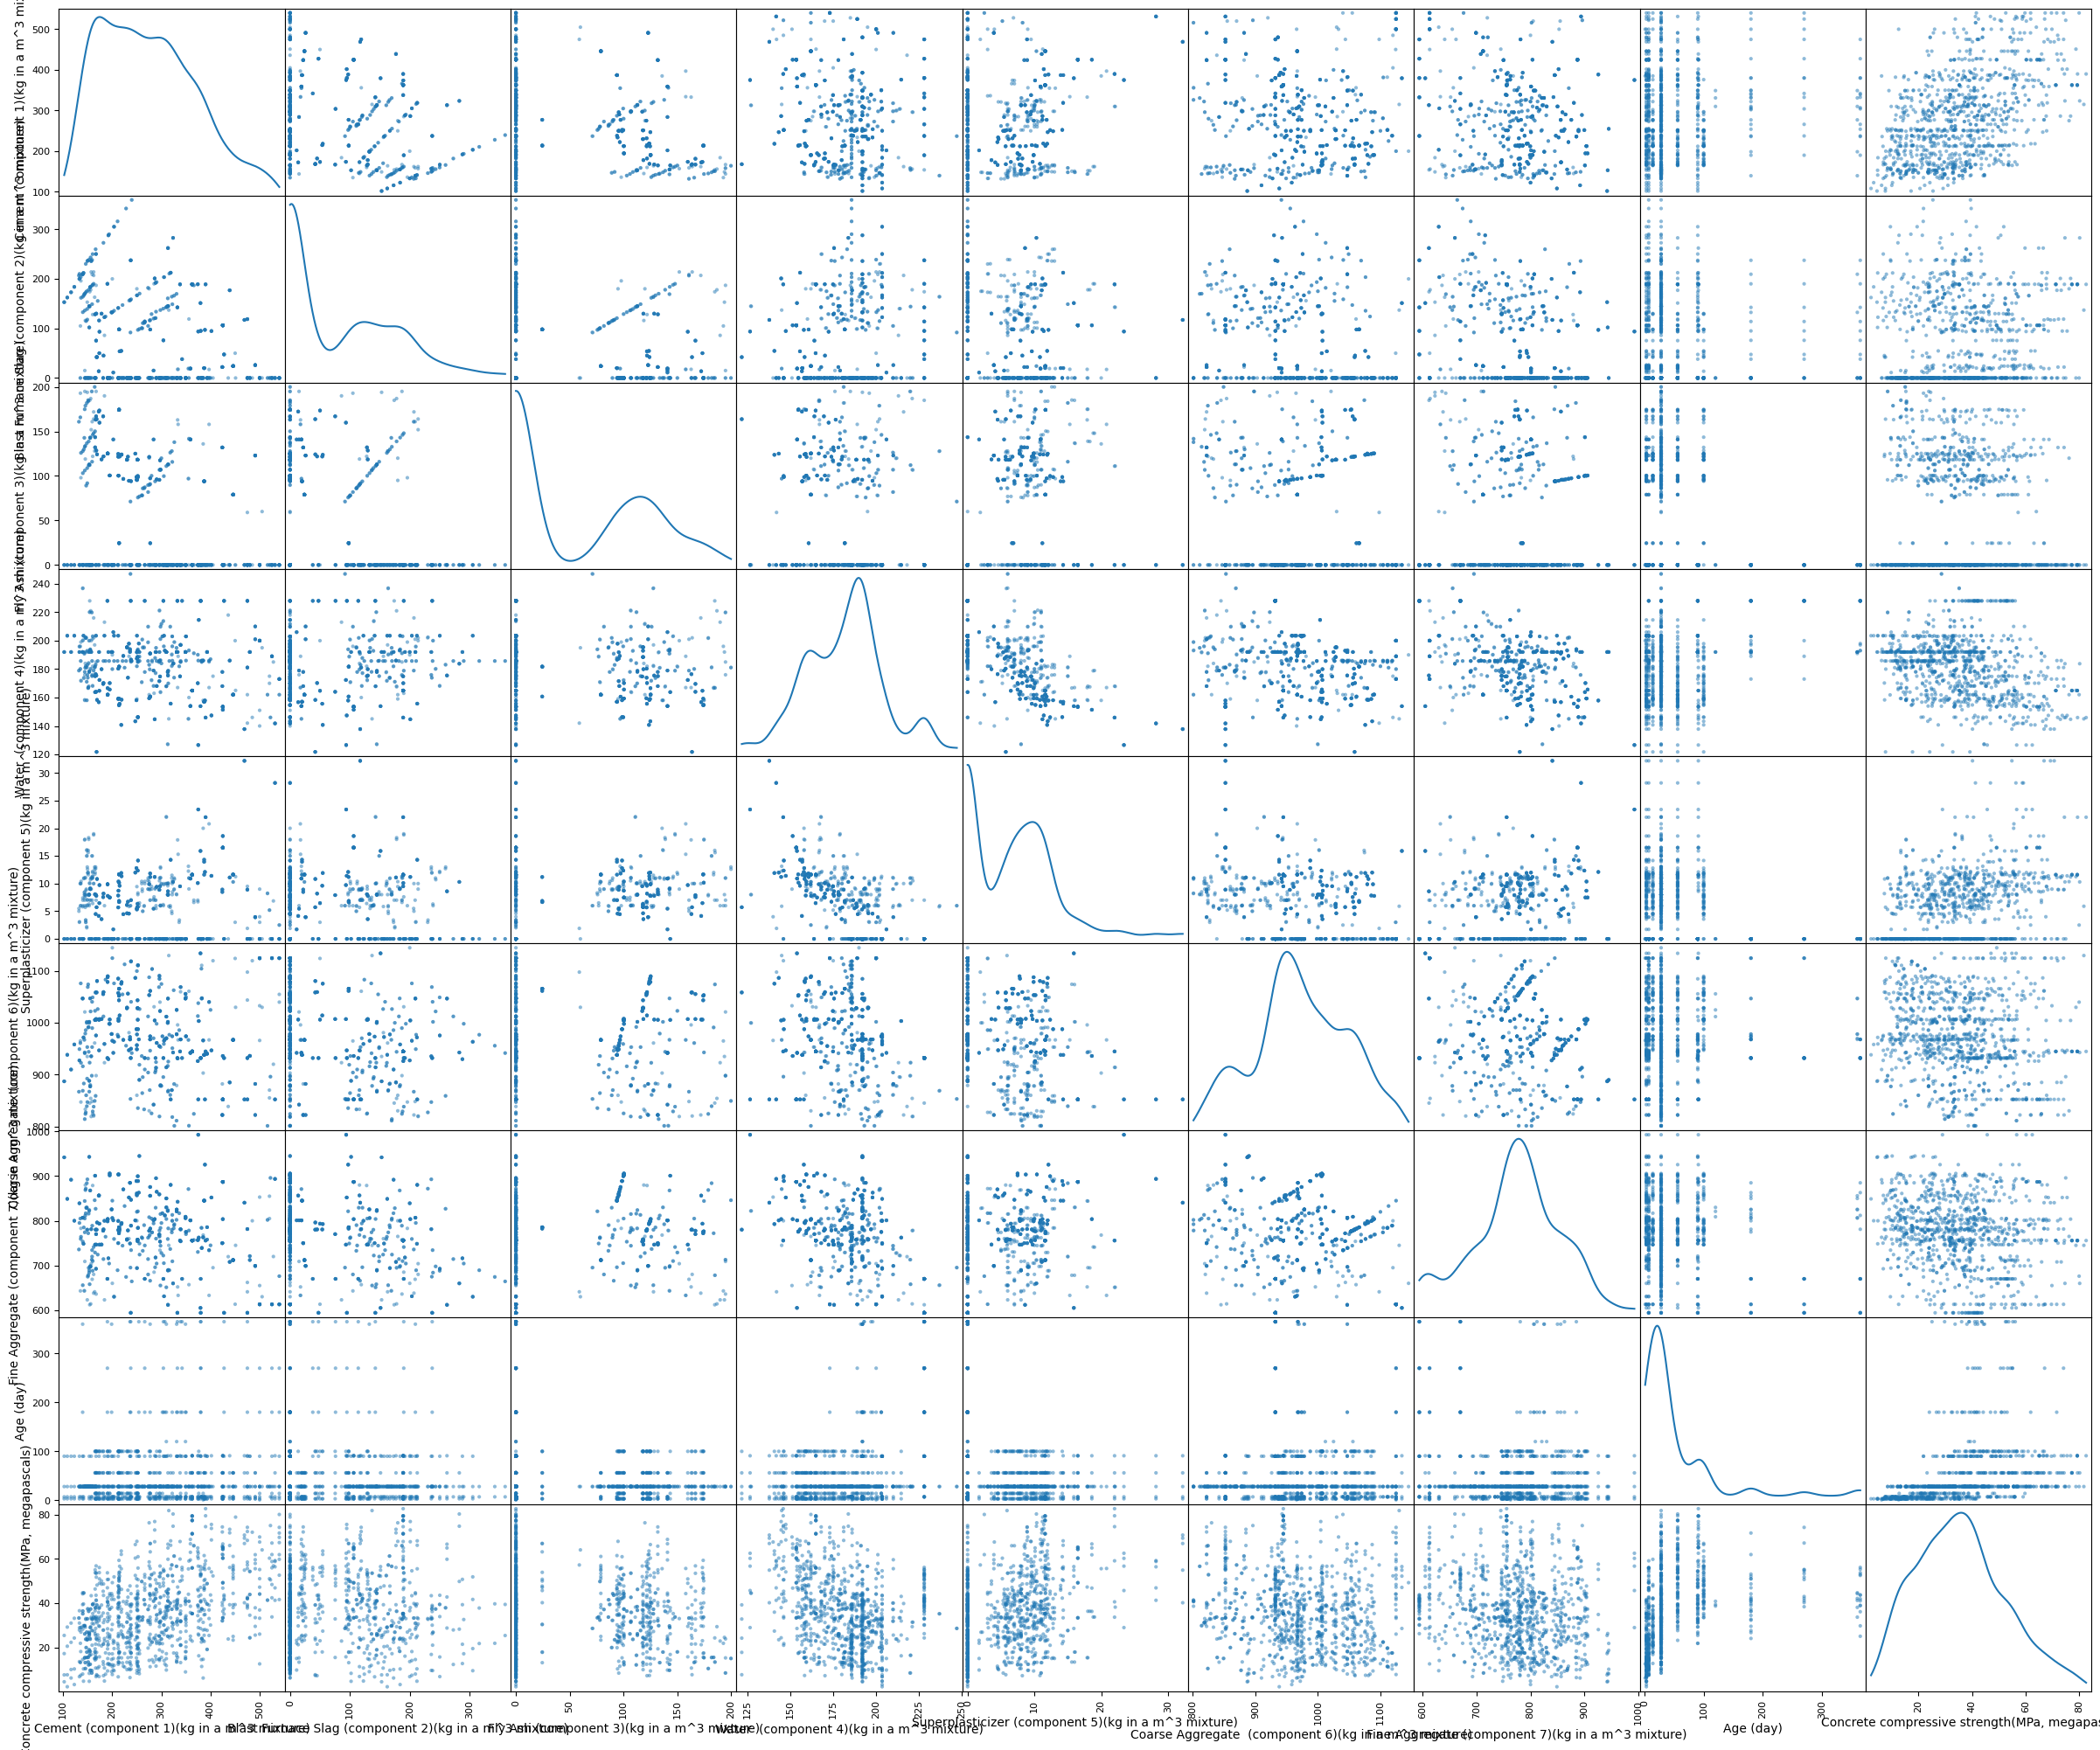

In [23]:
pd.plotting.scatter_matrix(dataset, figsize=(30,25), diagonal="density")

plt.show()

In [24]:
def normalization(dataset):
    mean = dataset.mean()
    std = dataset.std()
    normalized_dataset = (dataset - mean) / std
    return normalized_dataset

dataset_normalize = normalization(dataset)

x_base = normalization(dataset.drop(["Concrete compressive strength(MPa, megapascals) "], axis=1))
y_base = dataset["Concrete compressive strength(MPa, megapascals) "]

x_train, x_test, y_train, y_test = train_test_split(x_base, y_base, test_size=0.2)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

- - -
#### 5. Реализовать градиентный спуск (3 балла)
Используйте описание метода градиентного спуска, которое было приведено на лекции. Не забудьте добавить в матрицу признаков обучающей выборки столбец $\textbf{x}_0$, заполненный единицами. Напишите код, реализующий класс **LinearRegressionModel** и объявленные в нем методы.
The gradient descent formulation remain the same as one in the lecture. Keep in mind that you will need to add a column $\textbf{x}_0$ with all 1s as part of the training data. You should write code to implement the **LinearRegressionModel** class and its predefined methods.

**Градиентный спуск:** ЗАПРЕЩАЕТСЯ вызывать какие-либо библиотечные функции и использовать иной готовый код для построения модели линейной регрессии и поиска ее параметров. Можно использовать только базовые математические операции из пакета numpy, например, скалярное произведение и матричное умножение. Проследите, чтобы код для обучения модели был полностью векторизован.

In [60]:
# Внимание: нельзя использовать библиотечный код для реализации линейной регрессии, напишите свой!
# Не забудьте поменять значения self.attribute = 0 на более подходящие или (лучше) задать их перед началом обучения

class LinearRegressionModel:
    """
    Перечень действий, которые можно выполнить с моделью
    """

    def __init__ (self):
        """
        Инициализация модели
        """
        self.theta = None # вектор параметров модели
        self.alpha = 0.01  # скорость обучения
        self.cost  = 0    # значение функционала качества обученной модели (значение функции стоимости)


    def gradient_descent(self, X_train, y_train, theta, alpha, iters):
        """
        Реализация градиентного спуска
        Входные данные:
        alpha: скорость обучения
        iters: количество итераций

        Выходные данные:
        theta: обновлённое значение вектора параметров
        cost: итоговое значение функции стоимости
        """
        y_count = len(y_train)
        cost = 0

        for i in range(iters):
            predictions = np.dot(X_train, theta)
            errors = predictions - y_train

            gradient = (1/y_count) * np.dot(X_train.T, errors)

            theta -= alpha * gradient

            cost = (1/(2*y_count)) * np.sum(errors**2)

        return theta, cost

    def fit_with_GD(self, X_train, y_train, iters=200):
        """
        Обучение модели методом градиентного спуска
        """
        n, m = X_train.shape

        X_b = np.c_[np.ones((n, 1)), X_train]

        self.theta = np.zeros((m + 1, 1))

        self.theta, cost = self.gradient_descent(X_b, y_train, self.theta, self.alpha, iters)
        return cost

    def fit_with_normal_equations(self, X_train, y_train):
        """
        Обучение с помощью решения системы нормальных уравнений (МНК)
        """
        n, m = X_train.shape

        X = np.c_[np.ones((n, 1)), X_train]

        y_train = y_train.reshape(-1, 1)

        left = np.dot(X.T, X)
        right = np.dot(X.T, y_train)

        n_params = left.shape[0]
        augmented_matrix = np.hstack((left, right))

        for i in range(n_params):
            pivot = augmented_matrix[i, i]
            if np.isclose(pivot, 0):
                raise ValueError("Система уравнений не может быть решена (нулевой главный элемент).")

            augmented_matrix[i] = augmented_matrix[i] / pivot

            for j in range(i + 1, n_params):
                factor = augmented_matrix[j, i]
                augmented_matrix[j] -= factor * augmented_matrix[i]

        theta = np.zeros((n_params, 1))
        for i in range(n_params - 1, -1, -1):
            theta[i] = augmented_matrix[i, -1] - np.dot(augmented_matrix[i, i + 1:n_params], theta[i + 1:n_params])

        self.theta = theta

        predictions = np.dot(X, self.theta)
        errors = predictions - y_train
        cost = (1 / (2 * n)) * np.sum(errors**2)

        return cost


    def predict(self, X_test):
        """
        Предсказание значения с помощью обученной модели
        """
        # поместите сюда ваш код
        m = X_test.shape[0]

        X_b = np.c_[np.ones((m, 1)), X_test]

        y_predict = np.dot(X_b, self.theta)

        return y_predict

    def __str__(self):
        """
        Вывод всех параметров модели при вызове функции print()
        """
        return f"Вектор параметров: {self.theta}"



my_model = LinearRegressionModel()
# поместите сюда ваш код для вызова экземпляра класса LinearRegressionModel

print(my_model.fit_with_GD(x_train, y_train, iters=1000))
print(my_model.fit_with_normal_equations(x_train, y_train))

0.20221243503495506
0.19877650380391265


* **Скорость обучения:** попробуйте использовать разные скорости обучения и подберите такое значение, которое обеспечивает быструю сходимость. При выборе скорости обучения нужно следить за графиком функции качества (стоимости), построенном относительно количества итераций работы алгоритма градиентного спуска. Значение функционала качества $Q(\theta)$ должно быстро убывать и стремиться к небольшому значению. Такое поведение также является свидетельством того, что алгоритм работает корректно. Если скорость обучения слишком большая, значение функционала качества $Q(\theta)$ может начать колебаться и расти. По графику, который должен строить код в ячейке ниже, необходимо выбрать наиболее подходящую скорость обучения из числа проанализированных, и обосновать свой выбор. Без этого объяснения баллы за данную задачу начислены не будут.

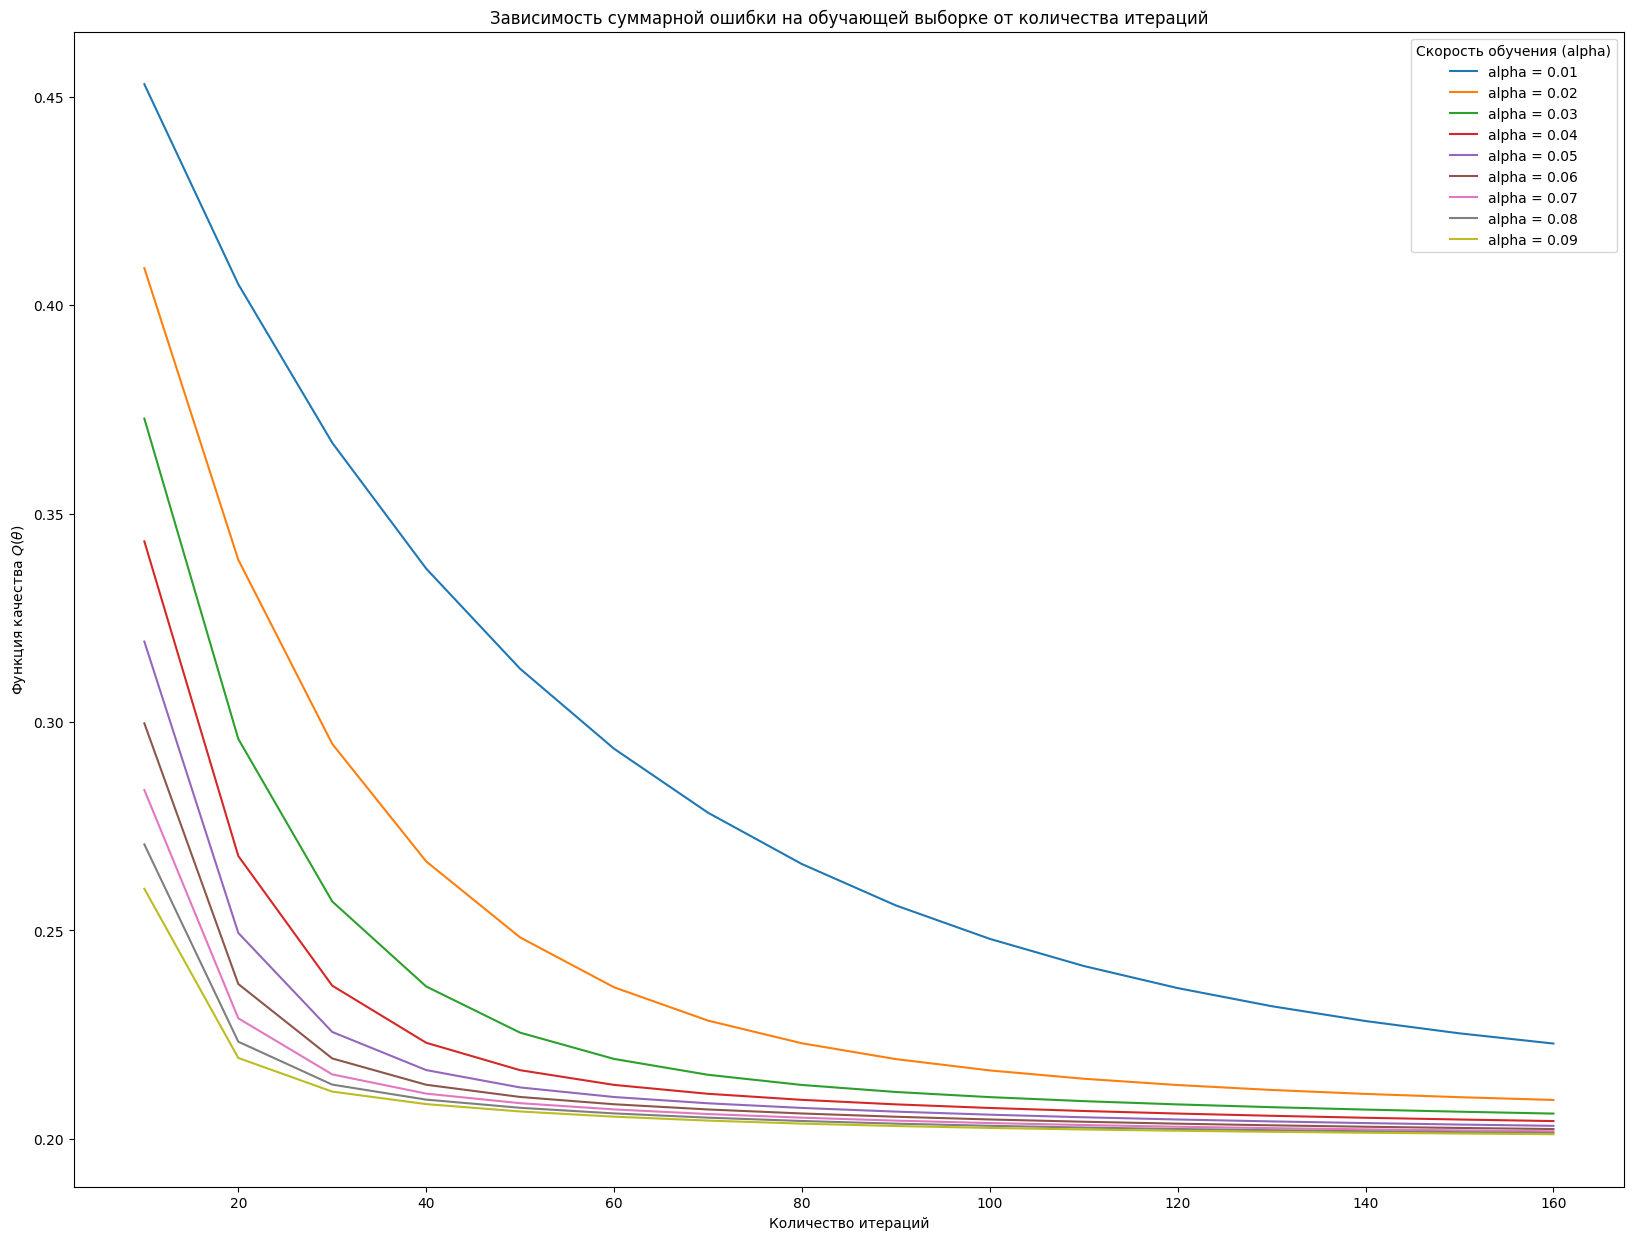

In [26]:
# Используйте следующий код, чтобы построить график скорости обучения.
# Для построения графика функции качества необходимо заполнить списки iters и costs
# Можно построить несколько кривых на одном графике, соответствующих разным скоростям обучения, чтобы выбрать наилучшую

plt.figure(figsize=(20, 15))
iters = list(range(10, 170, 10))

for i in range(1, 10): # <- эти параметры имеет смысл подобрать самостоятельно
    my_model.alpha = i/100
    costs = []
    for j in iters:
        cost = my_model.fit_with_GD(x_train, y_train, iters=j)
        costs.append(cost)
    plt.plot(iters, costs, label=f'alpha = {my_model.alpha}')

# не забудьте про легенду
plt.legend(title='Скорость обучения (alpha)')
plt.xlabel('Количество итераций')
plt.ylabel(r'Функция качества $Q(\theta)$')
_= plt.title('Зависимость суммарной ошибки на обучающей выборке от количества итераций')


Представленный набор графиков отображает изменение функцианала качества в зависимости от колличества итераций и скорости обучения (α). На основе приведенных примеров можно сделать вывод, что наиболее оптимальная скорость обучения достигается при α = 0.4 или α = 0.5

- - -
#### 5. Решить систему нормальных уравнений (метод наименьших квадратов) (1 балл)

Как было показано на лекциях, решить задачу построения модели линейной регрессии можно в явном виде с помощью системы нормальных уравнений. Использование формулы для решения системы нормальных уравнений матричным способом не требует номирования признаков, подбора гиперпараметров и может быть легко реализовано в коде:

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Обратите внимание, что здесь так же нужно добавить столбец из единиц в матрицу $\mathbf{X}$, чтобы найти свободный член (смещение).

In [44]:
# Реализуйте метод fit_with_normal_equations класса LinearRegressionModel перед тем,
# как выполнить приведенный ниже код

my_normal_equations_model = LinearRegressionModel()
cost = my_normal_equations_model.fit_with_normal_equations(x_train, y_train)

print(cost)
print(my_normal_equations_model)

0.19877650380391265
Вектор параметров: [[ 2.35352023e-04]
 [ 6.98923643e-01]
 [ 5.05275028e-01]
 [ 2.87271371e-01]
 [-2.36521283e-01]
 [ 9.24120100e-02]
 [ 3.54363677e-02]
 [ 5.17757886e-02]
 [ 4.21809811e-01]]


- - -
#### 6. Сравнить разные методы (2 балла)

Оцените и сравните решения задачи построения уравнения линейной регрессии методом градиентного спуска и методом решения системы нормальных уравнений (методом наименьших квадратов). В теории они должны быть одинаковыми или хотя бы схожими. Для более полной оценки следует воспользоваться встроенной в библиотеку `sklearn` реализацией [алгоритма **Stochastic Gradient Descent (SGD)**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) в качестве третьего метода для сравнения. Для каждого метода (и полученной с его помощью модели) необходимо вычислить RMSE на **тестовой выборке** как меру производительности. Вы можете использовать готовые функции из библиотеки для вычисления, как показано ниже, вместо того чтобы писать собственный код:

- Какой из методов является наиболее производительным на заданном по варианту датасете?
- Как вы оцениваете ошибку каждой из построенных моделей? Приемлемо? Средне? Плохо?


In [59]:
from sklearn.metrics import mean_squared_error

# Использование встроенной реализации метода стохастического градиентного спуска для построения модели
from sklearn.linear_model import SGDRegressor
my_sgd_model = SGDRegressor()
my_sgd_model.fit(x_train, y_train.ravel())
y_predict = my_sgd_model.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
my_sgd_model_rmse = np.sqrt(mse)
print("SGD:", my_sgd_model_rmse)

# поместите сюда ваш код
# Обучение модели методом градиентного спуска
my_model = LinearRegressionModel()
my_model.alpha = 0.05
cost_gd = my_model.fit_with_GD(x_train, y_train, iters=200)
y_predict_gd = my_model.predict(x_test)
mse_gd = mean_squared_error(y_test, y_predict_gd)
my_gd_model_rmse = np.sqrt(mse_gd)
print("GD:", my_gd_model_rmse)

# Обучение модели методом МНК
my_normal_equations_model = LinearRegressionModel()
cost_ne = my_normal_equations_model.fit_with_normal_equations(x_train, y_train)
y_predict_ne = my_normal_equations_model.predict(x_test)
mse_ne = mean_squared_error(y_test, y_predict_ne)
my_ne_model_rmse = np.sqrt(mse_ne)
print("NE:", my_ne_model_rmse)


SGD: 0.5944060116140564
GD: 0.5976115760926544
NE: 0.5794981686446097


Было проведено сравнение трех различных моделей:

* Реализации градиентного спуска, встроенного в бибилиотеку sklearn
* Собственной реализации градиентного спуска
* Собственной реализации МНК

Для сравнения была использована метрика RMSE – корень из средеквадратичной ошибки.\
Поскольку для сравнения были использованы одинаковые метрики и разбиение на обучающую и тестовую выборку, сравнение может претендовать на корректность.\
На основе полученных данных можно сделать вывод о небольшом расхождении как значений, полученных стандартной функцией, так и рукописных.\
В целом ошибку можно считать ошибку приемлемой.\
Наиболее эффективной оказалась рукописная реализация функции градиентного спуска.

- - -
#### 7. Опшите полученные результаты (1 балл)

Напишите краткие выводы объемом в один абзац, ориентированные на нетехническую аудиторию (например, на вашего менеджера или начальника). Сосредоточьтесь на следующих вопросах:

- Как вы можете эффектно и эффективно представить ваше решение для проблемы прогнозирования целевой переменной из вашего датасета?
- Что вы узнали о проблеме на данный момент?
- Как можно улучшить ваше решение?

Было проведено исследование компрессиононной прочности бетона. На основе трех различных методов оптимизации были получены модели, предсказывающие указанное выше значение. Предсказание происходит на основе следующих параметров:

*   Содержание цемента(Cement) в бетоне
*   Содержание доменного шлака(Blast Furnace Slag) в бетоне
*   Содержание зольной пыли(Fly Ash) в бетоне
*   Содержание воды(Water) в бетоне
*   Содержание суперпластификатора(Superplasticizer) в бетоне
*   Содержание крупного наполнителя(Coarse Aggregate) в бетоне
*   Содержание мелкого наполнителя(Fine Aggregate) в бетоне
*   Возраст бетона(Age)

Все три модели проявили себя эффективно, предсказав значение с высокой точностью.\
На текущий момент были получены сведения о составе набора данных, зависимость интересующего нас параметра от всех остальных и составлены первые способы решения текущей задачи.\
Более эффективное решение можно получить путем изменения параметров инициализции градиентного спуска (изменить количество повторений и скорость обучения модели) или использовать более сложные методы решения.

- - -
### Нужна помощь?

Если у вас возникли трудности при выполнении задания, попробуйте следующие решения:

- Посмотрите слайды к презентации по регрессионному анализу и методам наименьших квадратов, градиентного спуска и стохастического градиентного спуска. Слайды можно найти в личном кабинете или в ТГ-канале курса.
- Задайте вопрос преподавателю в ТГ-канале курса.
- Задайте вопрос преподавателю лично в университете.